In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/raw_news.csv")
df.head()

,headline,published_at,source,sentiment,stock_ticker,price_before,price_after
0,Should You Buy Tesla While It's Below $350?,20250301T085000,Motley Fool,NEGATIVE,TSLA,292.980011,292.980011
1,Here's The Mystery Donor Who Donated 10 Tesla ...,20250301T080933,Benzinga,NEGATIVE,TSLA,292.980011,292.980011
2,Tesla Offers Deep Discounts Of Up To $7950 On ...,20250301T062727,Benzinga,POSITIVE,TSLA,292.980011,292.980011
3,"Tesla Owners Stay True To Their Cars, While GM...",20250301T051226,Benzinga,POSITIVE,TSLA,292.980011,292.980011
4,"After FSD Rollout In China, Musk Says Rollout ...",20250301T030038,Benzinga,NEGATIVE,TSLA,292.980011,292.980011


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2461 entries, 0 to 2460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   headline      2461 non-null   object 
 1   published_at  2461 non-null   object 
 2   source        2461 non-null   object 
 3   sentiment     2461 non-null   object 
 4   stock_ticker  2461 non-null   object 
 5   price_before  2461 non-null   float64
 6   price_after   2461 non-null   float64
dtypes: float64(2), object(5)
memory usage: 134.7+ KB


In [4]:
df.shape

(2461, 7)

<ipython-input-5-93a238e53d41>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="stock_ticker", data=df, palette="coolwarm")


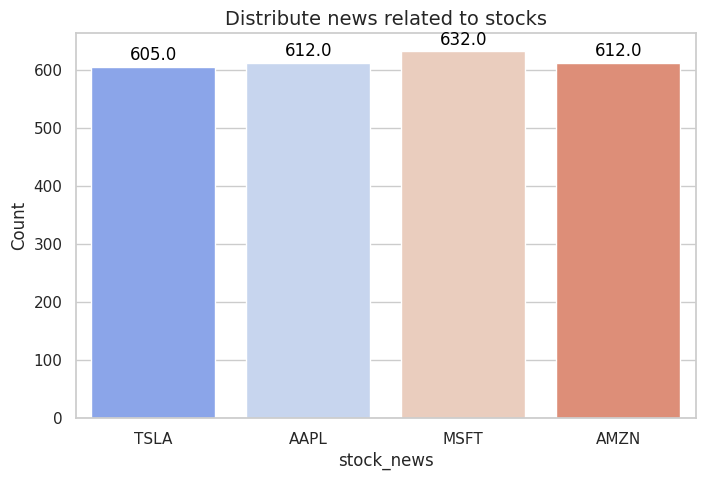

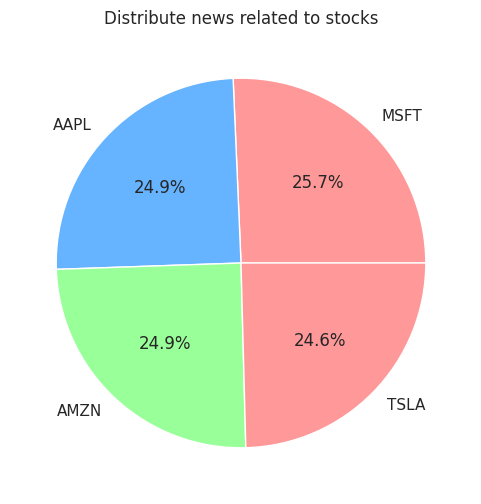

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_theme(style="whitegrid")

### رسم مخطط شريطي (Bar Plot)**
plt.figure(figsize=(8, 5))
ax = sns.countplot(x="stock_ticker", data=df, palette="coolwarm")
plt.title("Distribute news related to stocks", fontsize=14)
plt.xlabel("stock_news", fontsize=12)
plt.ylabel("Count", fontsize=12)

# إضافة الأعداد فوق الأعمدة
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

### 🥧 **2. رسم مخطط دائري (Pie Chart)**
plt.figure(figsize=(6, 6))
df["stock_ticker"].value_counts().plot.pie(autopct='%1.1f%%', colors=["#ff9999", "#66b3ff", "#99ff99"])
plt.title("Distribute news related to stocks")
plt.ylabel("")  # إخفاء عنوان المحور Y

plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


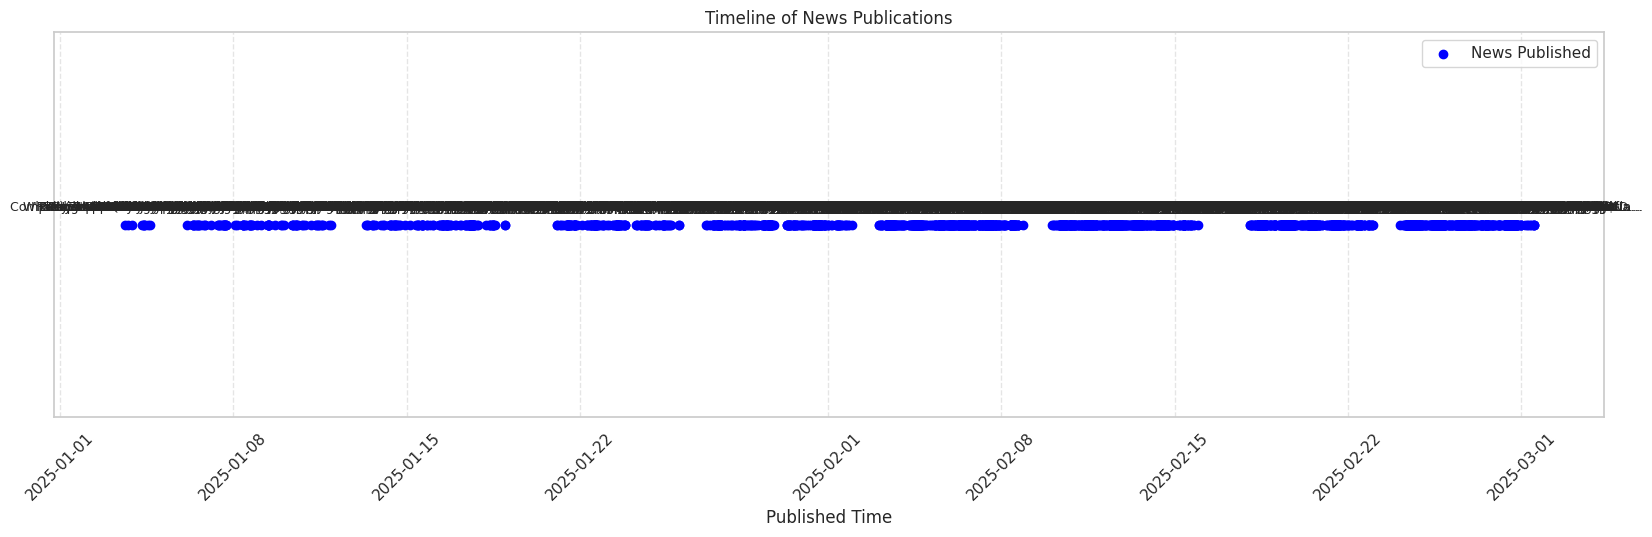

In [7]:
df["published_at"] = pd.to_datetime(df["published_at"], format="%Y%m%dT%H%M%S")

# ترتيب البيانات تصاعديًا حسب وقت النشر
df = df.sort_values(by="published_at")

# رسم البيانات
plt.figure(figsize=(20, 5))
plt.scatter(df["published_at"], [1] * len(df), color="blue", label="News Published")  # نقاط تمثل الأخبار
plt.xticks(rotation=45)  # تدوير التواريخ
plt.yticks([])  # إخفاء محور y لأنه غير مهم هنا
plt.xlabel("Published Time")
plt.title("Timeline of News Publications")
plt.grid(axis="x", linestyle="--", alpha=0.5)

# إضافة النصوص (عناوين الأخبار)
for i, txt in enumerate(df["headline"]):
    plt.annotate(txt[:30] + "...", (df["published_at"].iloc[i], 1),
                 textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.legend()
plt.show()